<a href="https://colab.research.google.com/github/nehcx/misalignVis/blob/master/ccls_replication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 | Requirements

In [1]:
!git clone -b master --depth=1 --recursive https://github.com/nehcx/misalignVis

Cloning into 'misalignVis'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 57 (delta 5), reused 37 (delta 2), pack-reused 0
Unpacking objects: 100% (57/57), 23.49 MiB | 2.74 MiB/s, done.
Updating files: 100% (48/48), done.
Submodule 'data/hachidaishu' (https://github.com/yamagen/hachidaishu) registered for path 'data/hachidaishu'
Cloning into '/content/misalignVis/data/hachidaishu'...
remote: Enumerating objects: 64, done.        
remote: Counting objects: 100% (64/64), done.        
remote: Compressing objects: 100% (53/53), done.        
remote: Total 64 (delta 17), reused 52 (delta 10), pack-reused 0        
Submodule path 'data/hachidaishu': checked out 'a0aaf7e0a42689db7ad2a78ab2eef9d5ac22341c'


In [8]:
import os
os.chdir('/content/misalignVis')
print(os.getcwd())

/content/misalignVis


In [2]:
# !apt-get install -y python-igraph 
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.4.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached hydra_core-1.2.0-py3-none-any.whl (151 kB)
  Using cached pytest-6.2.2-py3-none-any.whl (280 kB)
  Using cached leidenalg-0.8.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached cairocffi-1.3.0-py3-none-any.whl
  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
  Using cached dash-2.7.1-py3-none-any.whl (9.9 MB)
  Attempting uninstall: pytest
    Found existing installation: pytest 7.2.2
    Uninstalling pytest-7.2.2:
      Successfully uninstalled pytest-7.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

In [3]:
!apt-get install graphviz libgraphviz-dev
!pip install pygraphviz
!pip install dash jupyter-dash

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.10-cp310-cp310-linux_x86_64.whl size=184030 sha256=fce9f54c59c45ec4ab9a863b7db2e3f7ab8227300be028f34900c2792f82a4e6
  Stored in directory: /root/.cache/pip/wheels/e9/50/02/d9d68f6c947a928e517d5cd9af0ab007c1274fdba95fa9cbe3
Successfully built pygraphviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00


In [ ]:
!make build_bitext  # make bitexts.csv
!make build_metacode2lemma_dict  # make metacode2lemma dictionary
!make train_save_ibm2  # train and save ibm model 2
!make save_db 

cd src;	python make_bitext.py -s ../data/hachidaishu/hachidai.db -t ../data/translations/all_translations.txt -o ../cache/bitexts.csv
2023-05-25 17:21:02,700 [INFO] args: Namespace(src_path='../data/hachidaishu/hachidai.db', tar_path='../data/translations/all_translations.txt', out_path='../cache/bitexts.csv')
2023-05-25 17:21:02,700 [INFO] Loading ../data/hachidaishu/hachidai.db for Kokinwakashu texts...
2023-05-25 17:21:17,177 [INFO] Loading ../data/translations/all_translations.txt for kaneko's traslation...
2023-05-25 17:21:42,676 [INFO] Loading ../data/translations/all_translations.txt for katagiri's traslation...
2023-05-25 17:22:03,921 [INFO] Loading ../data/translations/all_translations.txt for kojimaarai's traslation...
2023-05-25 17:22:24,691 [INFO] Loading ../data/translations/all_translations.txt for komachiya's traslation...


In [4]:
!cp data/metacode2en.pkl cache/metacode2lemma_tar.pkl

# 2 | Dashboard

In [5]:
import subprocess
os.chdir('/content/misalignVis/src')
print(os.getcwd())

/content/misalignVis/src


In [6]:
"""Dash board."""
import pandas as pd
from plotly.graph_objs import Scatter, Layout, Figure
from plotly.graph_objs.layout import XAxis, YAxis, Margin
from jupyter_dash import JupyterDash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output, State
from bitexts import AlignmentInfo
from utils import load_pickle, lemma2metacode
from visualize_indivisual import draw_plotly_by_translator_by_poem
from visualize_aggregate_translator import draw_plotly_by_translator
from visualize_alignment import query, alignment_table, visualize_heatmap 

fullname2id_map = {
    "[KNK/金子] Kaneko, Motoomi (1933)": "kaneko",
    "[KBT/窪田] Kubota, Utsubo (1960)": "kubota",
    "[MTD/松田] Matsuda, Takeo (1968)": "matsuda",
    "[OZW/小沢] Ozawa, Masao (1971)": "ozawa",
    "[TKOK/竹岡] Takeoka, Masao (1976)": "takeoka",  
    "[OKMR/奥村] Okumura, Tsuneya (1978)": "okumura",
    "[KSJ/久曽神] Kyusojin, Hitachi (1979)": "kyusojin",
    "[KMCY/小町谷] Komachiya, Teruhiko (1982)": "komachiya",
    "[K&A/小島・新井] Kojima, Noriyuki and Arai, Eizo (1989)": "kojimaarai",
    "[KTGR/片桐] Katagiri, Yoichi (1998)": "katagiri",
}
translator_lst = fullname2id_map.keys()
metacode2lemma_map_src = load_pickle("../cache/metacode2lemma_src.pkl")
word_lst = [k + ":" + v  for k, v in metacode2lemma_map_src.items() if
            v in ["梅", "女郎花", "菊", "桜", "松", "山吹"]]
word_lst.sort()
with open("../README-app.md", 'r') as f: 
    readme = f.read()

def _blank(width, height, text, font_size): 
    Xn = [0]
    Yn = [0]
    trace = Scatter(
        x=Xn,
        y=Yn,
        mode="text",
    )
    annotation = text
    data = [trace]
    axis = dict(
        showline=False, 
        zeroline=False,
        showgrid=False,
        showticklabels=False,
        title="",
    )
    layout = Layout(
        # title=title,
        paper_bgcolor="rgba(0,0,0,0)",
        plot_bgcolor="rgba(0,0,0,0)",
        font=dict(size=16),
        showlegend=False,
        autosize=True,
        width=width,
        height=height,
        xaxis=XAxis(axis),
        yaxis=YAxis(axis),
        margin=Margin(
            l=0,
            r=0,
            b=85,
            t=40,
        ),
        hovermode="closest",
        annotations=
[
            dict(
                showarrow=False,
                text=annotation,
                xref="paper",
                yref="paper",
                x=0,
                y=0,
                xanchor="left",
                yanchor="bottom",
                font=dict(size=font_size),
            )
        ],
    )

    fig = Figure(data=data, layout=layout)
    return fig

app = JupyterDash(
    __name__,
    meta_tags=[
        {
            "name": "viewport", 
            "content": "width=device-width, initial-scale=1"
        }
    ],
)

app.layout = html.Div(
    children=[
        # title
        html.H1(
            children="""
            Dashboard for visualizing word alignment and misalignment between 
            classical poetic Japanese and its contemporary translations
            """,
        ),
        # query and intro
        dcc.Tabs(
            id="intro-and-query-tabs",
            value="what-is",
            parent_className="custom-tabs",
            className="custom-tabs-container",
            children=[
                dcc.Tab(
                    label="About",
                    value="what-is",
                    className="custom-tab",
                    selected_className="custom-tab--selected",
                    children=html.Div(
                        className="control-tab",
                        children=[
                            dcc.Markdown(readme),
                        ],
                    ),
                ),
                dcc.Tab(
                    label="Query",
                    value="alignment-tab-select",
                    className="custom-tab",
                    selected_className="custom-tab--selected",
                    children=html.Div(
                        className="app-controls-block",
                        children=[
                            # query word and translator
                            html.Div(
                                [
                                    html.Br(),
                                    html.Div([
                                        html.Label("Word:"),
                                        dcc.Dropdown(
                                            id="target",
                                            options=[
                                                {"label": i, "value": i} 
                                                for i in word_lst
                                            ],
                                            value="BG-01-5520-05-0106:女郎花",
                                            multi=False,
                                        ),
                                    ],
                                             style={
                                                 "width": "45%", 
                                                 "display": "inline-block",
                                             }
                                             ),

                                    html.Div([
                                        html.Label("Translator:"),
                                        dcc.Dropdown(
                                            id="translator",
                                            options=[
                                                {"label": i, "value": i} 
                                                for i in translator_lst
                                            ],
                                            value="[KNK/金子] Kaneko, Motoomi (1933)",
                                            multi=False,
                                        ),
                                    ],
                                             style={
                                                 "width": "45%", 
                                                 "float": "right", 
                                                 "display": "inline-block",
                                             }
                                             ),
                                ],
                            ),
                            # query specific poem
                            html.Br(),
                            html.Div(
                                [
                                    html.Label(
                                        """
                                        Query results (click cell to visualize 
                                        alignment and collective misalignment 
                                        network of the bitext on the selected 
                                        row):
                                        """
                                    ),
                                    dash_table.DataTable(
                                        id="datatable-paging",
                                        columns=[
                                            {"name": i, "id": i} for i in 
                                            ["poem", "queried word", 
                                             "source text", "target text"]
                                        ],
                                        page_current=0,
                                        page_size=3,
                                        page_action="custom",
                                        style_cell_conditional=[
                                            {"if": {"column_id": "target text"},                                        
                                             "width": "0%"},
                                            {"if": {"column_id": "source text"},                                        
                                             "width": "70%"},
                                            {"if": {"column_id": "poem"},                                        
                                             "width": "10%"},
                                            {"if": {"column_id": "queried word"},                                        
                                             "width": "20%"},
                                        ],
                                        style_cell={
                                            "overflow": "hidden",
                                            "textOverflow": "ellipsis",
                                            "maxWidth": 0,
                                        },
                                    ),
                                ],
                            ),
                        ],
                    ),
                ),
            ],
        ),

        html.Br(),
        dcc.Tabs(
            id="result-tabs",
            value="network-tab-select",
            parent_className="custom-result-tabs",
            className="custom-result-tabs-container",
            children=[
                dcc.Tab(
                    label="Word alignment visualization",
                    value="alignment-tab-select",
                    className="custom-tab",
                    selected_className="custom-tab--selected",
                    children=html.Div(
                        className="result-tab",
                        children=[
                            html.Div(
                                dcc.Graph(id="alignment-graph"),
                                style={
                                    "width": "100%", 
                                    "display": "inline-block",
                                },
                            ),
                        ],
                    ),
                ),

                # html.Hr(),
                dcc.Tab(
                    label="Collective misalignment network visualization",
                    value="network-tab-select",
                    className="custom-tab",
                    selected_className="custom-tab--selected",
                    children=html.Div(
                        className="result-tab",
                        children=[ 
                            html.Br(),
                            html.Div(
                                [
                                    html.Div(
                                        [
                                            # html.Label("Selected poem"),
                                            dcc.Graph(
                                                id="individual-network-graph"
                                            ), 
                                        ],       
                                        style={
                                            "width": "50%", 
                                            "float": "left", 
                                            "display": "inline-block",
                                        },
                                    ),

                                    html.Div(
                                        [
                                            # html.Label("All queried poems"),
                                            dcc.Graph(
                                                id="translator-network-graph"
                                            ), 
                                        ],       
                                        style={
                                            "width": "50%", 
                                            "float": "right", 
                                            "display": "inline-block",
                                        },
                                    ),
                                ],
                            ),
                        ],
                    ),
                ),
            ],
        ),
    ],
                      )


# Data table
@app.callback(
    [Output("datatable-paging", "page_current"),
     Output("datatable-paging", "page_count"),
     Output("datatable-paging", "data")],
    [Input("datatable-paging", "page_current"),
     Input("datatable-paging", "page_size"),
     Input("target", "value"),
     Input("translator", "value")],
    [State("datatable-paging", "data")]
)
def update_table(page_current, page_size, target, translator, table_data):
    target, word = target.split(":")
    translator = fullname2id_map[translator]
    candidates = query(target, translator)
    page_count = len(candidates) // page_size + 1
    candidate_df = pd.DataFrame({
        "poem": [candidate.poem for candidate in candidates],
        "source text": [candidate.source_surface for candidate in candidates],
        "target text": [candidate.target_surface for candidate in candidates],
        "queried word": [word for candidate in candidates],
    })
    data = candidate_df.iloc[
        page_current*page_size:(page_current+1)*page_size
    ].to_dict("records")
    if table_data is not None:
        try: 
            table_data[0]
        except:
            page_current = page_count - 1
    return page_current, page_count, data


# Alignment visualization and individual poem network visualization
@app.callback(
    [Output("alignment-graph", "figure"),
     Output("individual-network-graph", "figure")],
    [Input("datatable-paging", "active_cell"),
     Input("datatable-paging", "page_current"),
     Input("datatable-paging", "page_size"),
     Input("translator", "value"),
     Input("target", "value")],
    [State("datatable-paging", "data")]
)
def update_alignment_and_individual_network_graph(
        active_cell, page_current, page_size, 
        translator, target, table_data):
    try:
        target, word = target.split(":")
        translator = fullname2id_map[translator]
        if active_cell:
            row = active_cell["row"]
            queied_word = table_data[row]["queried word"]
            if queied_word == word:
                idx = table_data[row]["poem"]
                text = table_data[row]["source text"]
            else:
                candidates = query(target, translator)    
                current_candidate = candidates[page_current*page_size]    
                idx = current_candidate.poem
                text = current_candidate.source_surface
        else:
            candidates = query(target, translator)    
            current_candidate = candidates[page_current*page_size]    
            idx = current_candidate.poem
            text = current_candidate.source_surface
        _, heatmap, targets = alignment_table(idx, translator, target)
        fig_alignment = visualize_heatmap(heatmap, targets)
        fig_alignment.update_layout(transition_duration=500)
        fig_individual_network = draw_plotly_by_translator_by_poem(target, idx)
        fig_individual_network.update_layout(
            title = f"<span style='font-size: 14px;'>{target} {word}</span>" + 
            "<br>" +
            f"<span style='font-size: 10px;'>{text} -古今{idx}</span>"
        )
        fig_individual_network.update_layout(transition_duration=500)
        return fig_alignment, fig_individual_network
    except:
        return (_blank(1000, 600, "Queried word was not found.", 12),
                _blank(500, 600, "Queried word was not found.", 12))


# Global network visualization
@app.callback(
    Output("translator-network-graph", "figure"),
    [Input("target", "value")]
)
def update_translator_network(target):
    try:
        target = target.split(":")[0]
        fig = draw_plotly_by_translator(target)
        fig.update_layout(transition_duration=500)
        return fig
    except:
        return _blank(500, 600, "Queried word was not found.", 12)

AttributeError: ignored

In [26]:
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

# 3 | Visualization by Graphviz


## 3.1 | Aggregate Visualization

In [ ]:
import subprocess

os.chdir('/content/misalignVis/src')
print(os.getcwd())

/content/misalignVis/src


In [ ]:
import re
import igraph as ig
from dataclasses import astuple, asdict
from utils import load_pickle, lemma2metacode
import bitexts
from bitexts import AlignmentInfo
import math
from IPython.display import SVG

In [23]:
DB = load_pickle("../cache/bitexts.db")
translator_lst = DB.translators
metacode2lemma_map_src = load_pickle("../cache/metacode2lemma_src.pkl")
metacode2lemma_map_tar = load_pickle("../cache/metacode2lemma_tar.pkl")
romaji2kanji_map = {
    "kaneko": "KNK",
    "katagiri": "KTGR",
    "kojimaarai": "K&A",
    "komachiya": "KMCY",
    "kubota": "KBT",
    "kyusojin": "KSJ",
    "matsuda": "MTD",
    "okumura": "OKMR",
    "ozawa": "OZW",
    "takeoka": "TKOK"
}

In [31]:
def _gen_graph(alignment_summary, edge_info, source_words, source_word_translator_set, target_word_set):

    # Edge by translator generator
    def edge_by_translator():
        for stat in alignment_summary.summary:
            source_word = stat.alignment[0]
            target_word = stat.alignment[1]
            stat = asdict(stat)
            for (key, value) in stat.items():
                if (key == "alignment") or (key == "total"):
                    continue
                source_node = f"{source_word}-{key}"
                target_node = target_word
                weight = value
                if weight == 0:
                    continue
                yield (source_node, target_node, weight, 8)

    # Aligned target word generator
    def target_words():
        for info in edge_info:
            target_word = info.alignment[1]
            if target_word in target_word_set:
                continue
            target_word_set.add(target_word)
            yield target_word

    # Source word with translator coding generator
    def source_words_by_translator():
        for word in source_words:
            info_lst = alignment_summary.query_details_by_source(word)
            for info in info_lst:
                word = info.word
                translator = info.translator
                name = (word, translator)
                if name in source_word_translator_set:
                    continue
                source_word_translator_set.add(name)
                yield name

    # Source word node generator
    def source_nodes():
        for row in source_words_by_translator():
            source_word = row[0]
            translator = row[1]
            name = source_word + "-" + translator
            node_ja = metacode2lemma_map_src[source_word]
            node_eng = ja2eng_map.get(node_ja)
            # if node_eng is None:
            #     print(node_ja)
            # else:
            #     node_eng = node_eng.replace(" ", "\n")
            node = f"{node_eng}\n({romaji2kanji_map[translator]})"
            node_type = 1
            type_label = "source"
            weight = 0
            shape = "ellipse"
            info_lst = alignment_summary.query_details_by_source(row[0])
            for info in info_lst:
                if info.translator != row[1]:
                    continue
                weight += 1
            yield (name, node, node_type, type_label, weight, shape)

    # Target word node generator
    def target_nodes():
        for word in target_words():
            name = word
            node = f"{metacode2lemma_map_tar[word]}"
            node_type = 2
            type_label = "target"
            weight = 0
            shape = "rectangle"
            info_lst = alignment_summary.query_details_by_target(word)
            for info in info_lst:
                weight += 1
                source_metacode = info.alignment[0].split("-")
                target_metacode = info.alignment[1].split("-")
                if source_metacode[:4] == target_metacode[:4]:
                    node_type = 3
                    type_label = "dublicate"
            yield (name, node, node_type, type_label, weight, shape)

    # Igraph construction
    node_lst = list(source_nodes()) + list(target_nodes())
    node_lst = sorted(node_lst, key=lambda x: (x[2], x[4]), reverse=True)
    edge_lst = list(edge_by_translator())
    edge_lst = sorted(edge_lst, key=lambda x: (x[1], x[2]), reverse=True)
    graph = ig.Graph.TupleList(edge_lst, directed=False, edge_attrs=["label", "fontsize"])

    for node_attr in node_lst:
        name, node, node_type, type_label, weight, shape = node_attr
        for v in graph.vs:
            if v["name"] != name:
                continue
            v["label"] = node
            v["node_type"] = node_type
            v["type_label"] = type_label
            if weight >= 5:
                v["style"] = "filled"
                v["fillcolor"] = "lightyellow"
            if node_type == 1:
                v["style"] = "filled"
                v["fillcolor"] = "lightgrey"
                v["width"] = 0.1
                v["fontsize"] = 8
            else:
                v["fontsize"] = (math.log(weight+7)) * 5
            v["shape"] = shape
    return graph

def _filter(alignment_info_lst):
    """To remove edges that contain the same nodes with source nodes and stop pos."""
    for alignment_info in alignment_info_lst:
        source, target = alignment_info.alignment
        # BG-16: symbols
        # BG-0[456789]: words that are not nouns, verbs or adjectives
        # BG-03-1000: demonstratives
        pattern = re.compile(r'BG-16|BG-0[456789]|BG-03-1000')
        if pattern.match(target):
            continue
        if source[3:15] == target[3:15]:
            continue
        yield alignment_info


def retrive_igraph_by_translator(*source_words):
    """Retrive igraph format data with translator attension.

    :return graph: igraph-converted information.
    """
    target_word_set = set()
    source_word_translator_set = set()
    alignment_lst = DB.query_improper_alignment_by_word(*source_words)    
    alignment_lst = list(_filter(alignment_lst))
    alignment_summary = bitexts.AlignmentSummary(alignment_lst)
    edge_info = alignment_summary.alignment_info  # For edges' annotation

    return _gen_graph(alignment_summary, edge_info, source_words, source_word_translator_set, target_word_set)

In [32]:
def dot_viz_aggr(word, width=None):
    code = lemma2metacode(word, metacode2lemma_map_src)
    g = retrive_igraph_by_translator(code)
    g.write_dot(f"../artifacts/{word}.dot")
    if width:
        with open(f"../artifacts/{word}.dot", "r") as file:
            lines = file.readlines()

        # attr
        lines.insert(2, f'  size="{width},";\n')
        lines.insert(3, '  ratio="fill";\n')

        # lines.insert(4, '  mode="ipsep";\n')
        # lines.insert(5, '  sep=1;\n')
        # lines.insert(6, '  overlap=false;\n')
        
        with open(f"../artifacts/{word}.dot", "w") as file:
            file.writelines(lines)
    neato_command = f"neato -Tsvg ../artifacts/{word}.dot -o ../artifacts/{word}.svg"
    subprocess.run(neato_command, shell=True, check=True)
    display(SVG(filename=f"../artifacts/{word}.svg")) 

### 3.2 | Examples

#### 3.2.1 | *Ume*, en. plum

Lemma has the following semantic codings:
 1: BG-01-5520-20-0401
 2: BG-01-5520-20-0402
Input one ID to query:1


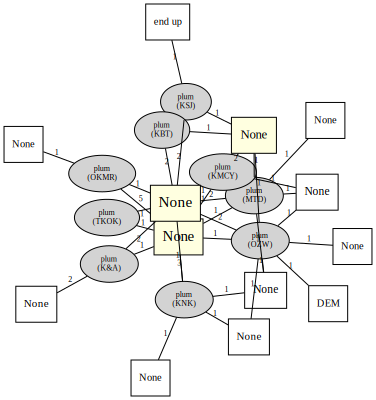

In [34]:
dot_viz_aggr("梅")

#### 3.2.2 | *Ominaeshi*, en. golden valerian

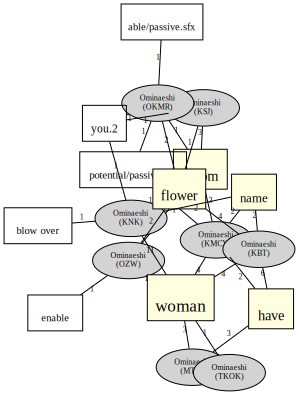

In [ ]:
dot_viz_aggr("女郎花")

#### 3.2.3 | *Kiku*, en. chrysanthemum

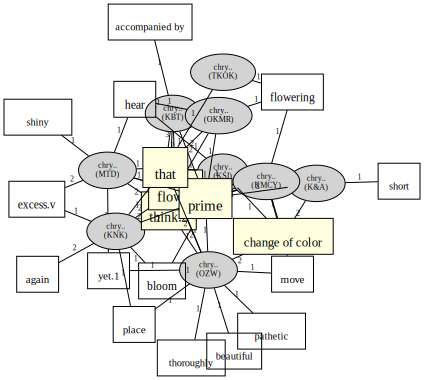

In [ ]:
dot_viz_aggr("菊")

#### 3.2.4 | *Sakura*, en. cherry

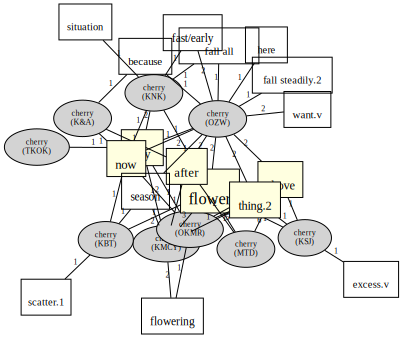

In [ ]:
dot_viz_aggr("桜")

#### 3.2.5 | *Matsu*, en. pine

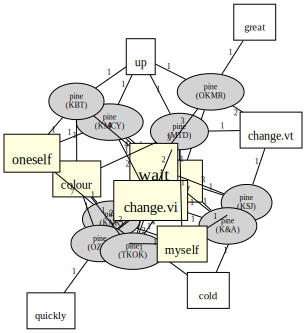

In [ ]:
dot_viz_aggr("松")

#### 3.2.6 | *Yamabuki*, en. kerria

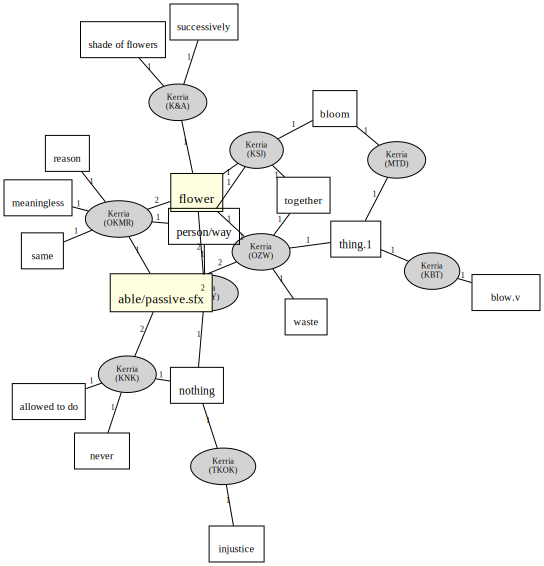

In [ ]:
dot_viz("山吹")

## 3.2 | Breakdown Visualization

In [ ]:
def retrive_igraph_by_poem_by_translator(idx: str, *source_words):
    """Retrive igraph format data from one poem with a translator attension.

    :return graph: igraph-converted information.
    """
    target_word_set = set()
    source_word_translator_set = set()
    alignment_lst = DB.query_improper_alignment_by_word_in_poem(idx, *source_words)    
    alignment_lst = list(_filter(alignment_lst))
    alignment_summary = bitexts.AlignmentSummary(alignment_lst)
    edge_info = alignment_summary.alignment_info  # For edges" annotation
    
    return _gen_graph(alignment_summary, edge_info, source_words, source_word_translator_set, target_word_set)

In [ ]:
def dot_viz_brkd(word, width=None):
    code = lemma2metacode(word, metacode2lemma_map_src)
    candidates = DB.query_bitext_by_word(code)
    poems = {}
    candidates = DB.query_bitext_by_word(code)
    for candidate in candidates:
        if candidate.poem in poems.keys():
            break
        poems[candidate.poem] = candidate.source_surface
        print(candidate.poem, candidate.source_surface)
    idx = str(input("Input poem id: "))
    print(idx, poems[idx])
    query = DB.query_by_poem(idx)
    for candidate in query:
        print(candidate.translator, candidate.target_surface)

    g = retrive_igraph_by_poem_by_translator(idx, code)
    g.write_dot(f"../artifacts/{idx}-{word}.dot")
    if width:
        with open(f"../artifacts/{idx}-{word}.dot", "r") as file:
            lines = file.readlines()

        # attr
        lines.insert(2, f'  size="{width},";\n')
        lines.insert(3, '  ratio="fill";\n')
        # lines.insert(4, '  mode="ipsep";\n')
        # lines.insert(5, '  sep=1;\n')
        # lines.insert(6, '  overlap=false;\n')

        with open(f"../artifacts/{word}.dot", "w") as file:
            file.writelines(lines)

    neato_command = f"neato -Tsvg ../artifacts/{idx}-{word}.dot -o ../artifacts/{idx}-{word}.svg"
    subprocess.run(neato_command, shell=True, check=True)
    display(SVG(filename=f"../artifacts/{idx}-{word}.svg")) 

#### 3.2.1 | Example

226 なにめてゝおれるはかりそ女郎花われおちにきと人にかたるな
227 女郎花うしと見つゝそゆきすくるおとこ山にしたてりと思へは
228 秋のゝにやとりはすへし女郎花なをむつましみたひならなくに
229 女郎花おほかる野邊にやとりせはあやなくあたの名をやたちなん
230 女郎花秋のゝ風にうちなひき心ひとつをたれによすらん
231 秋ならてあふことかたき女郎花あまのかはらにおひぬ物ゆへ
232 たか秋にあらぬ物ゆへ女郎花なそ色に出てまたきうつろふ
233 妻こふる鹿そ鳴なるをみなへしをのかすむのゝ花としらすや
234 をみなへし吹過てくる秋風はめにはみえねとかこそしるけれ
235 人のみることやくるしき女郎花秋霧にのみ立かくるらん
236 ひとりのみなかむるよりはをみなへしわかすむやとにうへてみましを
237 女郎花うしろめたくもみゆるかなあれたる宿にひとりたてれは
238 花にあかてなにかへるらん女郎花おほかるのへにねなましものを
Input poem id: 226
226 なにめてゝおれるはかりそ女郎花われおちにきと人にかたるな
kaneko お前の若い女という名に愛でて、折っておいただけの事ぞ、これや女郎花よ、必ず拙僧が女に手を掛けて堕落してしまったなど、人に噂してくれるなよ。
kojimaarai 名前にひかれて折っただけのことだほんとに、おみなえしよ。わたしが堕落してしまったと人に言うなよ。
komachiya 女という名前に心ひかれて折り取っただけだ。女郎花よ、私が堕落したなどと人に話してはいけないよ。
kubota 女郎花という、その名によって愛でて、折り取ったばかりであるぞ。女郎花よ、僧である自分が堕落したと、世間の人に話すなよ。
kyusojin 名前が気に入って折ったまでのことである。おみなえしよ、私が堕落してしまったなどと、他の人に語ってくれるな。
matsuda 女というその名を愛して折り取っただけだ。女郎花よ、自分が堕落してしまったと、人々に話してくれるな。
okumura 名前が気に入って折っただけのことだよ。女郎花よ、この私が堕落したなどと、他人にしゃべってはいけないよ。
ozawa いい名前がついていると思って感心したから折ってみただけなのだ。おみなえしよ。私が女性に近づいて堕落したなどと、人に話してはならないぞ。
takeoka 

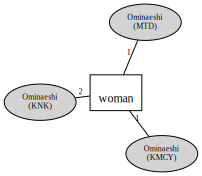

In [ ]:
dot_viz_brkd("女郎花")